# Learning Rate Comparison
This document will cover:
- How to pit the model-creation and model-training code into callable functions
- How to run parametric experiments with ANN models
- The effects of learning rate on performance
- That puzzzling results provide learning opportunity

In [46]:
# import libraries
import numpy as  np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

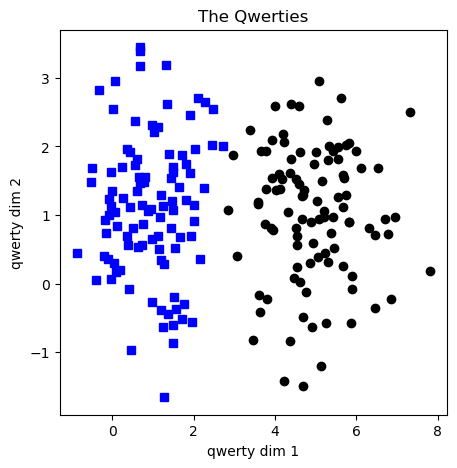

In [47]:

nPerClust = 100
blur = 1

A = [1, 1]
B = [5, 1]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# True labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# Concatenate into a matrix
data_np = np.hstack((a,b)).T

# Convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('The Qwerties')
plt.xlabel('qwerty dim 1')
plt.ylabel('qwerty dim 2')
plt.show()

In [48]:
def creatANNmodel(learningRate):
    # model architecture
    ANNclassify = nn.Sequential(
        nn.Linear(2,1),     # input layer
        nn.ReLU(),          # activation function
        nn.Linear(1,1),     # output layer
        #tnn.Sigmoid()        # output layer activation function
    )

    # Loss function
    lossfunc = nn.BCEWithLogitsLoss()

    # optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

    # output
    return ANNclassify, lossfunc, optimizer

In [49]:
numepochs = 1000

def trainTheModel(ANNmodel):
    # initialize losses
    losses = torch.zeros(numepochs)

    # loop over epochs
    for epochi in range(numepochs):
        yHat = ANNmodel(data)
        loss = lossfunc(yHat, labels)
        losses[epochi] = loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNmodel(data)

    # compute the predictions and repot accuracy
    totacc = 100*torch.mean(((predictions>0) == labels).float())

    return losses,predictions,totacc

Final Accuracy: {totacc}%


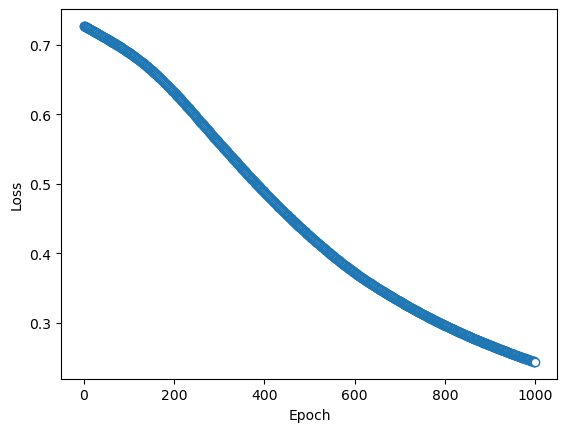

In [50]:
# Create Everything
ANNclassify, lossfunc, optimizer = creatANNmodel(.01)

# Run it
losses, predictions, totacc = trainTheModel(ANNclassify)

# Report Acc
print('Final Accuracy: {totacc}%')

# Show Losses
plt.plot(losses.detach(), 'o', markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

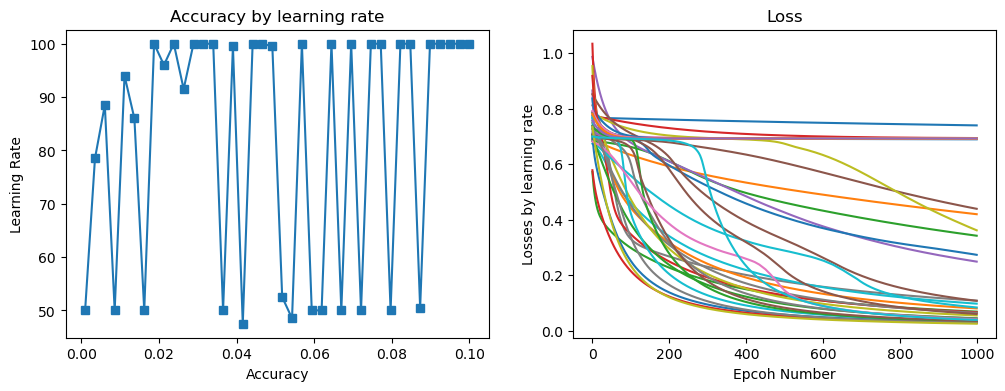

In [51]:
learningrates = np.linspace(.001,.1,40)

# initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates), numepochs))

# loop through learning rates
for i,lr in enumerate(learningrates):

    # create and run the model
    ANNclassify,lossfunc,optimizer = creatANNmodel(lr)
    losses,predictions,totacc = trainTheModel(ANNclassify)

    # store the result
    accByLR.append(totacc)
    allLosses[i,:] = losses.detach()


# Plot the results
fig, ax = plt.subplots(1,2,figsize=(12, 4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_ylabel('Learning Rate')
ax[0].set_xlabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_ylabel('Losses by learning rate')
ax[1].set_xlabel('Epcoh Number')
ax[1].set_title('Loss')
plt.show()

In [52]:
# proportion of runs where the model had at least 70% accuracy
print(sum(torch.tensor(accByLR)>70)/len(accByLR))

tensor(0.6750)


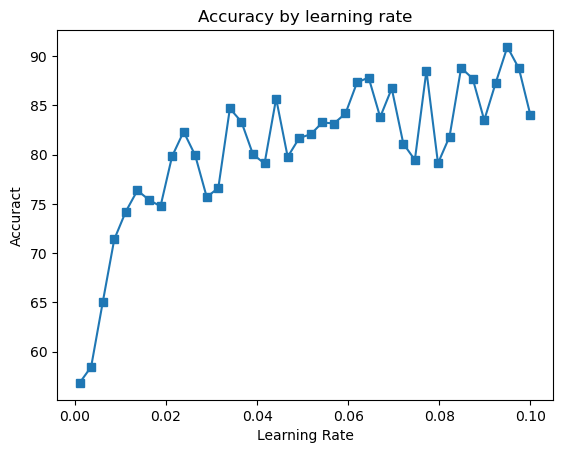

In [54]:
numExps = 50

# matrix to store all results
accMeta = np.zeros((numExps, len(learningrates)))

# Fewer epochs to reduce run time
numepochs = 500

for expi in range(numExps):
    for i,lr in enumerate(learningrates):
        # create and run the model
        ANNclassify,lossfunc,optimizer = creatANNmodel(lr)
        losses,predictions,totacc = trainTheModel(ANNclassify)

        # store the result
        accMeta[expi,i] = totacc

# Plot the Results
plt.plot(learningrates,np.mean(accMeta,axis=0), 's-')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()
